# Минимальный детектируемый эффект

## Теория

### Введение

**MDE** := Minimum Detectable Effect

Обозначения:
*   $\alpha$ &mdash; уровень значимости,
*   $\beta$ &mdash; мощность,
*   $n$ &mdash; размер группы,
*   $\varepsilon$ &mdash; величина эффекта.

При дизайне эксперимента:
1.   Задано: $\alpha, \beta, n \implies$ Какой минимальный эффект $\varepsilon$ можем задетектировать?
2.   Задано: $\alpha, \beta, \varepsilon \implies$ Какой минимальный размер групп нам необходим?





### Что в основе


$X_1...X_n$ &mdash; выборка  с параметрами $\mathsf{E} X_i = a_1$, $\mathsf{D} X_i = \sigma_1^2$

$Y_1...Y_m$ &mdash; выборка с параметрами $\mathsf{E} Y_i = a_2$, $\mathsf{D} Y_i = \sigma_2^2$

---
Гипотезы:
$\mathsf{H}_0\colon a_1 = a_2\ \ vs.\ \ \mathsf{H}_1\colon a_1 > a_2$\
Статистика:
$T(\overline{X}, \overline{Y}) = f\left(\overline{X} - \overline{Y}\right)$\
Критерий: $S = \{T(\overline{X}, \overline{Y}) > z_{1-\alpha}\}$.



При справедливости $\mathsf{H}_0$ получаем\
$$
    T(\overline{X}, \overline{Y}) = \frac{\overline{X} - \overline{Y}}{\sqrt{\frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{m}}} \stackrel{\mathsf{H}_0}{\approx} \mathcal{N}(0, 1)
$$


### Случай наличия эффекта


$X_1...X_n$ &mdash; выборка   $\mathsf{E}X_i = a_1$,
$\mathsf{D}X_i = \sigma_1^2$\
$Y_1...Y_m$ &mdash; выборка   $\mathsf{E}Y_i = a_2$,
$\mathsf{D}Y_i = \sigma_2^2$

Гипотезы:
$\mathsf{H}_0\colon a_1 = a_2\  vs.\ \ \mathsf{H}_1\colon a_1 > a_2$

---

Пусть $\varepsilon = (a_1 - a_2)$ &mdash; эффект.\
$$
    \overline{X} - \overline{Y} \stackrel{\mathsf{H}_1}{\approx} \mathcal{N}\left(\varepsilon, \frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{m}\right)
$$.\
Тогда из условий на уровень значимости и мощность:
$$
    \varepsilon \ge \left( z_{1-\alpha} + z_{\beta}\right) \sqrt{\frac{\sigma_1^2}{n} + \frac{\sigma_2^2}{m}} \stackrel{n=m}{=}\left( z_{1-\alpha} + z_{\beta}\right) \sqrt{\frac{\sigma_1^2 +\sigma_2^2}{n}}
$$

### Итоговый ответ


$$\varepsilon_{min} = MDE = \left( z_{1-\alpha} + z_{\beta}\right) \sqrt{\frac{\sigma_1^2 +\sigma_2^2}{n}}$$  
  


$$n = \left( z_{1-\alpha} + z_{\beta}\right)^2 \frac{\sigma_1^2 +\sigma_2^2}{\varepsilon^2}$$

## Практика

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm

import matplotlib.pyplot as plt
import scipy.stats as sps

sns.set_style("darkgrid")
sns.set(palette='Set2', font_scale=1.5)

### 1. Визуализация теоретических зависимостей

MDE &mdash; это наименьший истинный эффект полученный от изменений, который с уверенностью сможет обнаружить статистический критерий. Формула расчёта MDE зависит от выбранного критерия, в нашем случае она будет следующей:

$$
\text{MDE}=(Z_{1-\alpha}+Z_{\beta})\cdot\sqrt{\frac{\sigma_X^2+\sigma_Y^2}{n}}
$$

где $Z_{1-\alpha}$ и $Z_{\beta}$ - соответствующие квантили нормального распределения, $n$ - размер выборки, $\sigma_X^2$ и $\sigma_Y^2$ - дисперсии.

Также можно совершить обратную операцию: зная требуемое значение эфекта, получить необходимый размер выборки по следующей формуле:

$$
n = (Z_{1-\alpha}+Z_{\beta})^2\cdot\frac{\sigma_X^2+\sigma_Y^2}{\varepsilon^2}
$$

Рассмотрим зависимости формул MDE и размера выборки от дисперсии, желаемых ошибки первого рода и мощности критерия. Для начала зафиксируем значения переменных.

In [40]:
var_x = var_y = 1  # Дисперсии выборок
sample_size = 100  # Размер выборки
effect = 0.1  # Размер эффекта
alpha = 0.05  # Уровень значимости
betas = np.array([0.4, 0.6, 0.8, 0.99]).reshape(-1, 1)  # Значения мощности

Реализуем функции подбора размера выборки и расчета MDE в соответствии с выведенными формулами

In [41]:
def get_mde(alpha, beta, sample_size, var_x, var_y=var_x):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_x, var_y: дисперсии выборок
    :returns: теоретический MDE
    '''

    q_sum = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return q_sum / np.sqrt(sample_size) * np.sqrt(var_x + var_y)

In [42]:
def get_sample_size(alpha, beta, mde, var_x, var_y=var_x):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_x, var_y: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    q_sum = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return np.ceil((q_sum ** 2) * (var_x + var_y) / (mde * mde)).astype(int)

Также сделаем вспомогательную функцию для визуализации результатов

In [43]:
def plot(grid, mdes, sample_sizes, title='', third_dimension=None, label=''):
    ''' Строит графики MDE и размера выборки по сетке значений. '''

    _, axes = plt.subplots(1, 2, figsize=(20, 8))

    plt.suptitle(title, fontsize=20)

    if third_dimension is not None:
        for mde, sample_size, third in zip(mdes, sample_sizes, third_dimension):
            axes[0].plot(grid.reshape(-1), mde, lw=5, label=f'{label} = {third[0]}')
            axes[0].legend()
            axes[1].plot(grid.reshape(-1), sample_size, lw=5)
    else:
        axes[0].plot(grid.reshape(-1), mdes, lw=5)
        axes[1].plot(grid.reshape(-1), sample_sizes, lw=5)


    axes[0].set_title('MDE')
    axes[0].set_xlabel(title, fontsize=20)
    axes[1].set_title('Размер выборки')
    axes[1].set_xlabel(title, fontsize=20)

    plt.show()

Будем исследовать зависимости следующим образом: зафиксируем все параметы эксперимента, кроме одного. Для этого выбранного параметра расчитаем формулы в срезе по разным мощностям

*Зависимость от дисперсии*

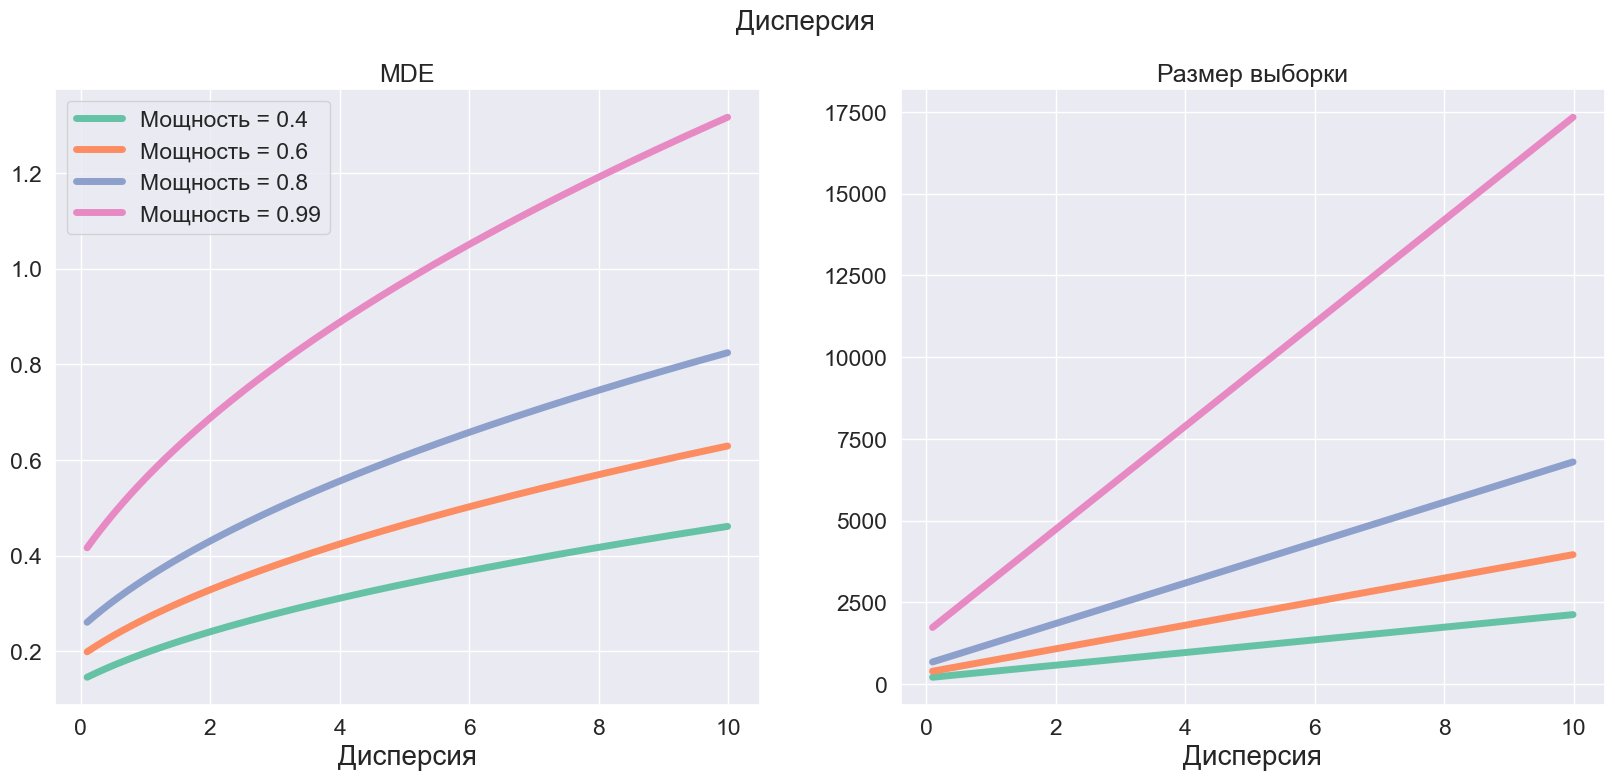

In [44]:
var_x_grid = np.arange(0.1, 10, 0.01).reshape(1, -1)

plot(
    var_x_grid,
    get_mde(alpha, betas, sample_size, var_x_grid),
    get_sample_size(alpha, betas, effect, var_x_grid),
    title='Дисперсия',
    third_dimension=betas,
    label='Мощность'
)

*Зависимость от ошибки 1 рода*

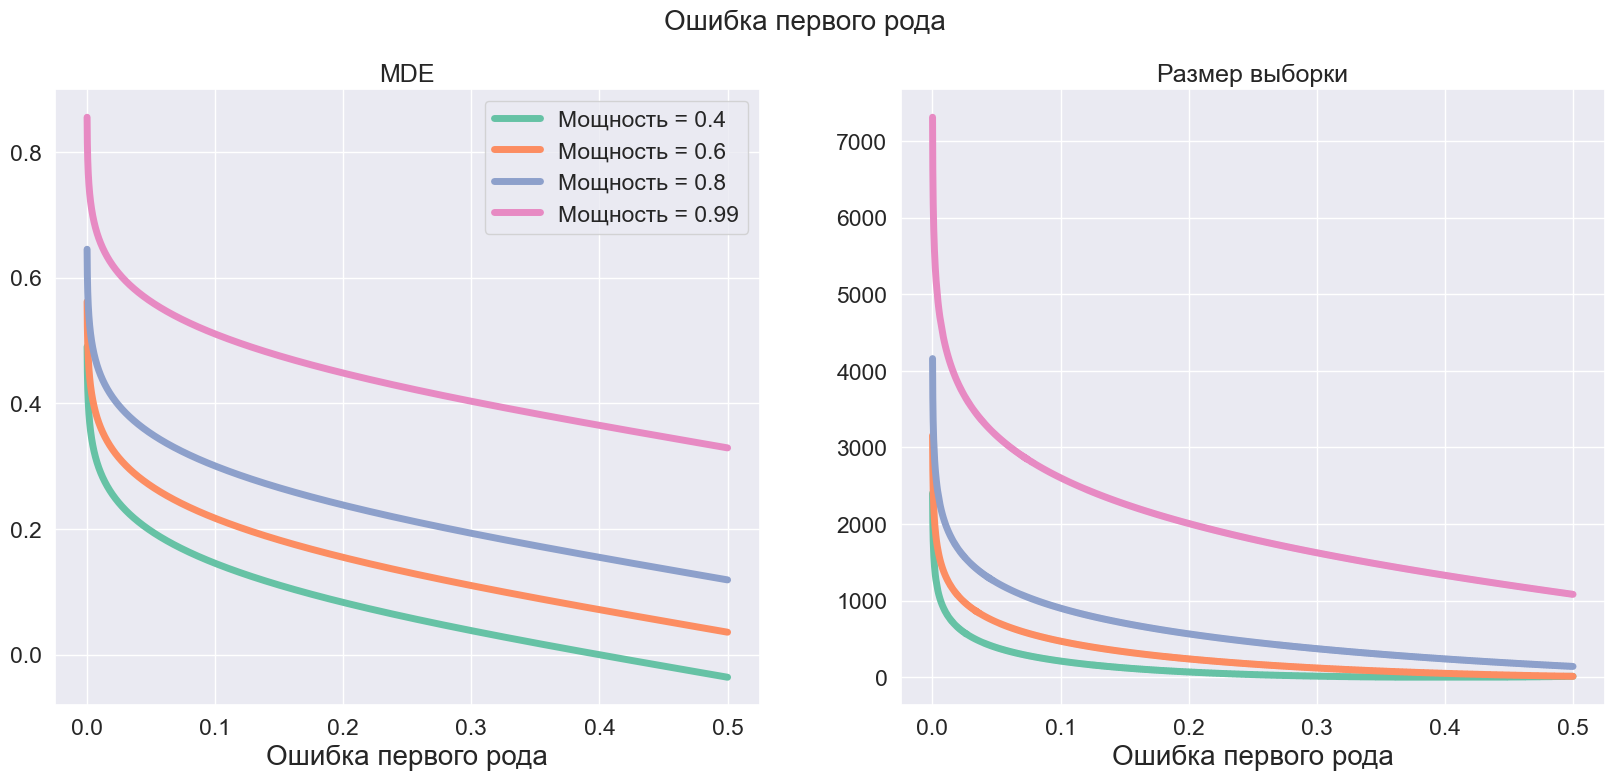

In [45]:
alpha_grid = np.arange(1e-4, 0.5, 1e-5)

plot(
    alpha_grid,
    get_mde(alpha_grid, betas, sample_size, var_x),
    get_sample_size(alpha_grid, betas, effect, var_x),
    title='Ошибка первого рода',
    third_dimension=betas,
    label='Мощность'
)

*Зависимость от мощности*

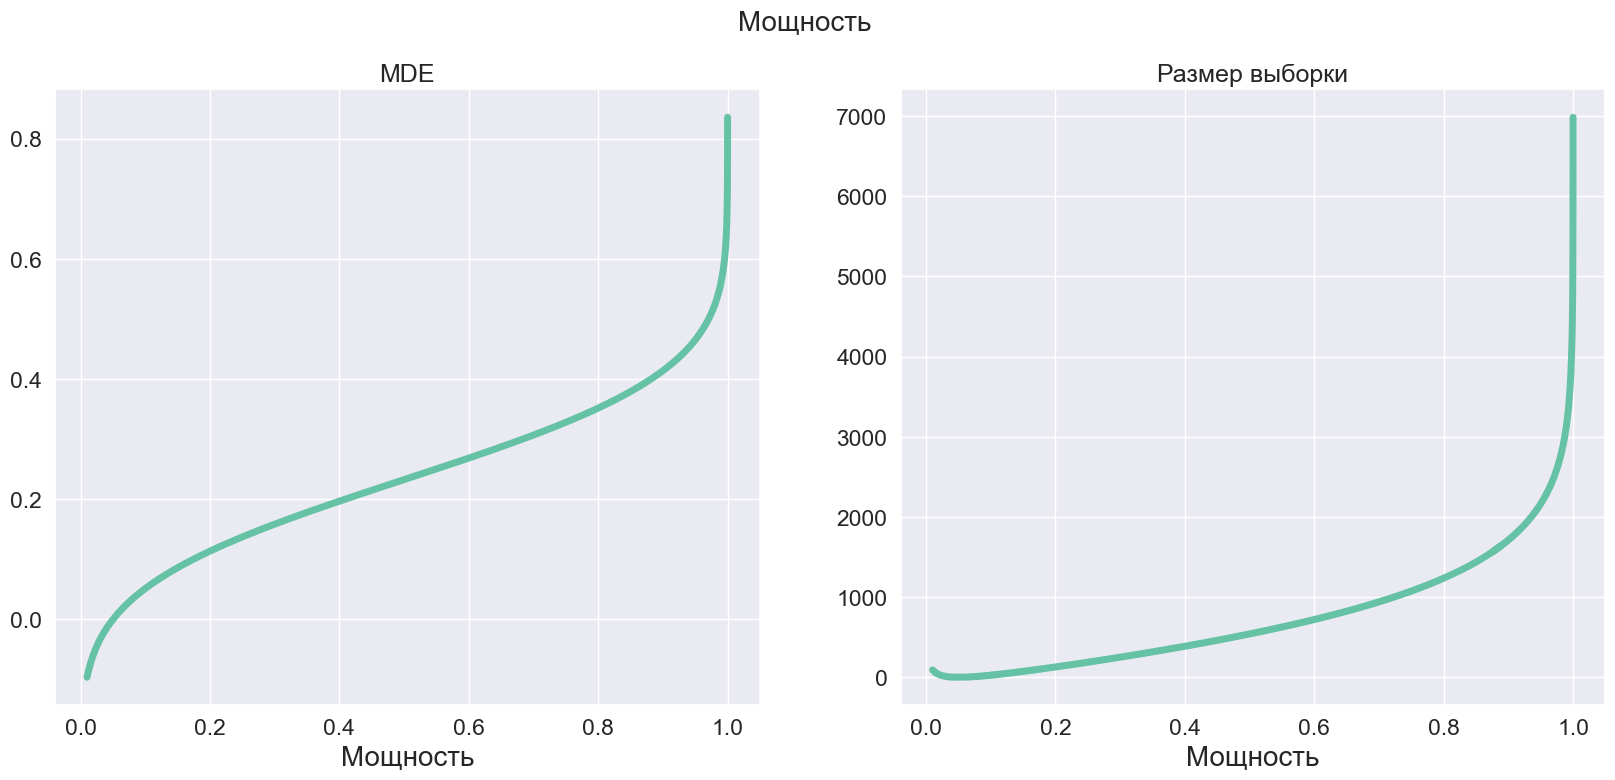

In [46]:
beta_grid = np.arange(1e-2, 1, 1e-5)

plot(
    beta_grid,
    get_mde(alpha, beta_grid, sample_size, var_x),
    get_sample_size(alpha, beta_grid, effect, var_x),
    title='Мощность',
)

*Зависимость MDE и размера выборки*

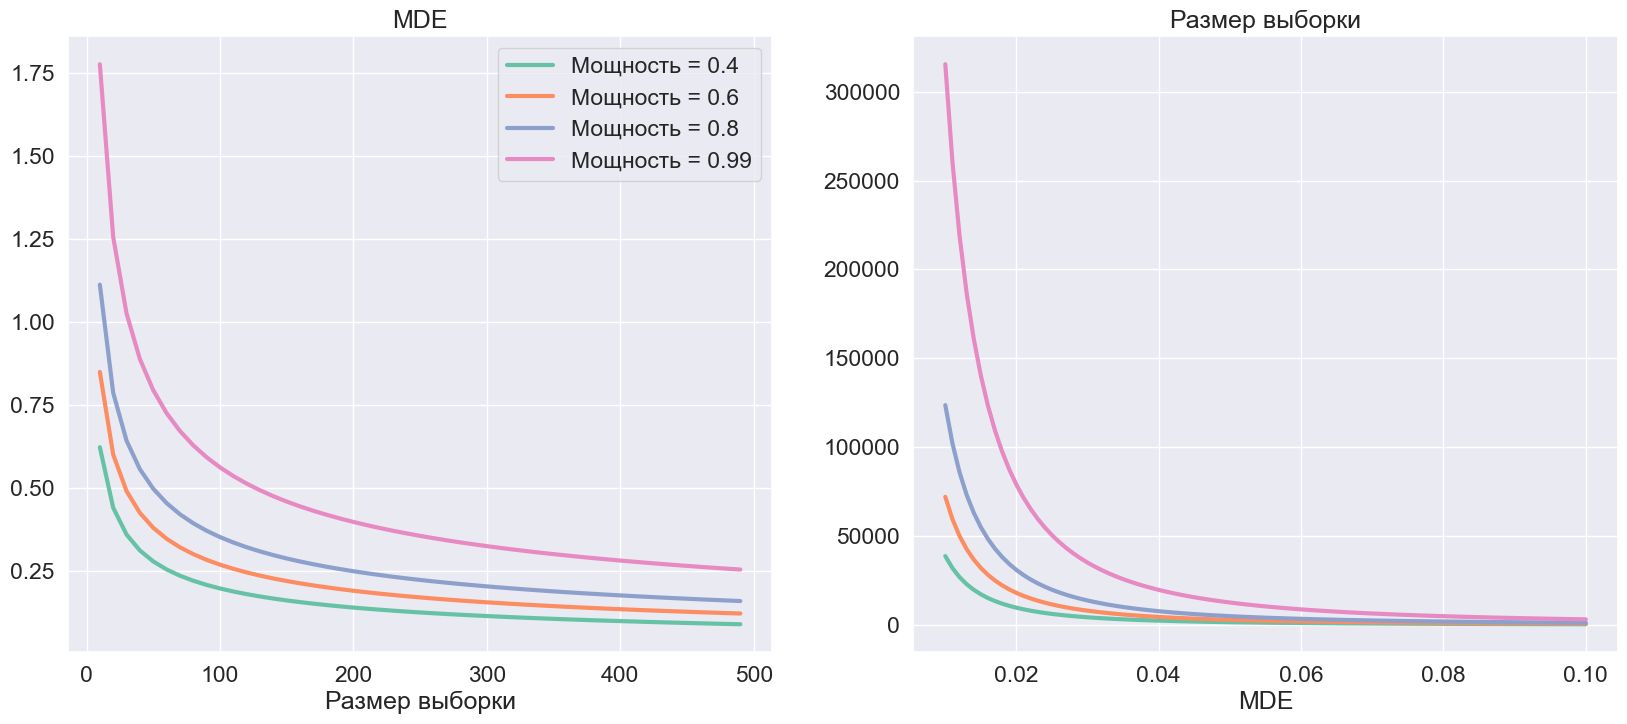

In [47]:
sample_size_grid = np.arange(10, 500, 10)
effect_grid = np.arange(1e-2, 0.1, 1e-3)

sample_sizes = get_sample_size(alpha, betas, effect_grid, var_x)
mdes = get_mde(alpha, betas, sample_size_grid, var_x)

third_dimension = betas

_, axes = plt.subplots(1, 2, figsize=(20, 8))

for mde, ss, third in zip(mdes, sample_sizes, third_dimension):
    axes[0].plot(sample_size_grid.reshape(-1), mde, lw=3, label=f'Мощность = {third[0]}')
    axes[0].legend()
    axes[1].plot(effect_grid.reshape(-1), ss, lw=3)


axes[0].set_title('MDE')
axes[0].set_xlabel('Размер выборки')
axes[1].set_title('Размер выборки')
axes[1].set_xlabel('MDE')

plt.show()

Теперь рассмотрим парную зависимость, а именно, как мощность и ошибка первого рода совместно влияют на MDE и размер выборки.

In [48]:
alpha_grid = np.arange(1e-2, 1, 1e-2).reshape(-1, 1)
beta_grid = np.arange(1e-2, 1, 1e-2)

mdes = get_mde(alpha_grid, beta_grid, sample_size, var_x)
sample_sizes = get_sample_size(alpha_grid, beta_grid, effect, var_x)

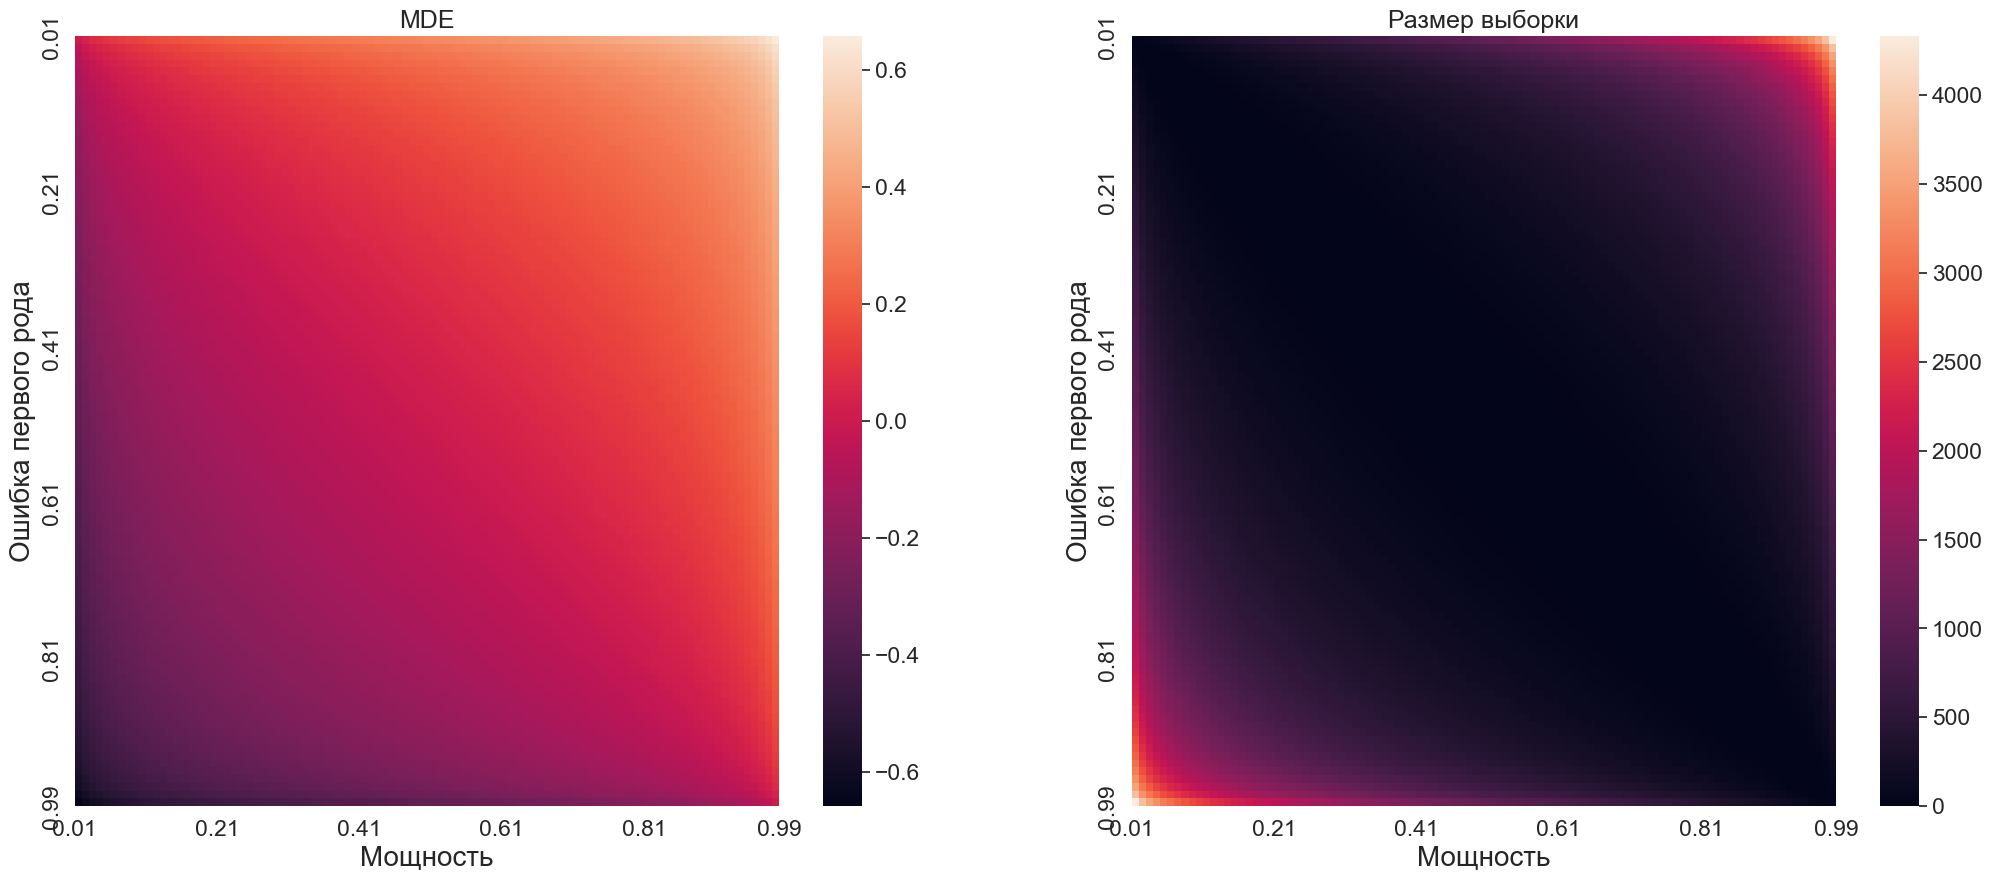

In [49]:
_, axes = plt.subplots(1, 2, figsize=(25, 10))

ticks = [0, 20, 40, 60, 80, 99]
ticklabels = alpha_grid.round(2).reshape(-1).tolist()[::20] + [alpha_grid[-1][0]]

axes[0].set_title('MDE')
sns.heatmap(mdes, ax=axes[0])

axes[1].set_title('Размер выборки')
sns.heatmap(sample_sizes, ax=axes[1])

for i in [0, 1]:
    axes[i].set_yticks(ticks)
    axes[i].set_yticklabels(ticklabels)
    axes[i].set_ylabel('Ошибка первого рода', fontsize=20)
    axes[i].set_xticks(ticks)
    axes[i].set_xticklabels(ticklabels)
    axes[i].set_xlabel('Мощность', fontsize=20)

plt.show()

Опишите наблюдаемые зависимости.

**Вывод:**

### 2. Планирование эксперимента

Перед непосредственным проведением эксперимента используемый критерий необходимо зафиксировать. Если для ошибки первого рода обычно берется значение $0.05$, дисперсия зависит от природы выборок, то величины других параметров нуждаются в подборе. Для этого подойдет следующая таблица:
- по строкам отложены значения детектируемого эффекта
- по столбцам отложены значения мощности
- в ячейках находятся расчитанные размеры выборок, соответствующие заданным MDE и мощности

Теперь для выбора значений нужно понять размен между этими величинами. Например, насколько большую выборку бизнес может себе позволить: сколько пользователей могут участовать в AB-тестировании и как долго. MDE также необходимо выбирать исходя из практической значимости эксперимента.

Для примера рассмотрим построение подобной таблицы для $\alpha=0.05$ и $\sigma_X = \sigma_Y = 1$:

In [50]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)
beta_grid = np.arange(0.1, 1, 0.1)

In [51]:
sample_sizes = get_sample_size(alpha, beta_grid, mde_grid, var_x)
df = pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))
df.columns.name = 'beta'
df.index.name = 'mde'

df

beta,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
mde,,,,,,,,,
0.01,2640,12904,25109,38726,54111,72064,94114,123652,171277
0.02,660,3226,6278,9682,13528,18016,23529,30913,42820
0.03,294,1434,2790,4303,6013,8008,10458,13740,19031
0.04,165,807,1570,2421,3382,4504,5883,7729,10705
0.05,106,517,1005,1550,2165,2883,3765,4947,6852
0.06,74,359,698,1076,1504,2002,2615,3435,4758
0.07,54,264,513,791,1105,1471,1921,2524,3496
0.08,42,202,393,606,846,1126,1471,1933,2677
0.09,33,160,310,479,669,890,1162,1527,2115


Теперь попробуем провести эксперимент. Допустим мы хотим иметь $MDE=0.05$ и мощность $\beta=0.8$. Оцените какой размер выборки нам необходимо взять?

In [80]:
mde = 0.05
beta = 0.8
var_x = var_y = 1  

sample_size = get_sample_size(
    alpha=alpha,
    beta=beta,
    mde=mde,
    var_x=var_x,
    var_y=var_y,
)# ваш код
print(f'Нужно взять выборку размера {sample_size}')

Нужно взять выборку размера 4947


Посмотрим, как ведет себя мощность критерия в зависимости от реального эффекта. Для этого расчитаем константу критерия

$$
c_\alpha = Z_{1-\alpha}\cdot\sqrt{\frac{2\sigma_X^2}{n}}
$$

In [81]:
c_alpha = sps.norm.ppf(1 - alpha) * (2 * var_x / sample_size) ** 0.5# ваш код
c_alpha 

0.03307282550033894

Далее будем оценивать мощность как долю отверженных гипотез на случайных запусках. Для этого сгенерируйте две выборки (контрольную и тестовую со смещением) из нормального распределения размера `(iters_count, sample_size)`, усредните каждую из них по `axis=1`, посчитайте разность между получившимися средними и сравните с константой критерия. Посчитайте долю отвержения. Повторите для нескольких значений смещения и постройте график мощности от смещения (эффекта).

In [82]:
real_effect_grid = np.arange(-0.1, 0.1, 0.01) # смещение
iters_count = 1_000

In [83]:
power = []
for real_effect in tqdm(real_effect_grid):
    # сгенерирйте выборки
    control_sample = np.random.rand(iters_count,sample_size)
    test_sample = np.random.rand(iters_count,sample_size) + real_effect

    # найдите среднее
    test_sample_mean = np.mean(test_sample,axis=1)
    control_sample_mean = np.mean(control_sample,axis=1)

    diff = control_sample_mean - test_sample_mean

    # посчитайте долю отвержения
    reject = np.mean(np.abs(diff) > c_alpha)

    power.append(reject)

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [00:03<00:00,  5.82it/s]


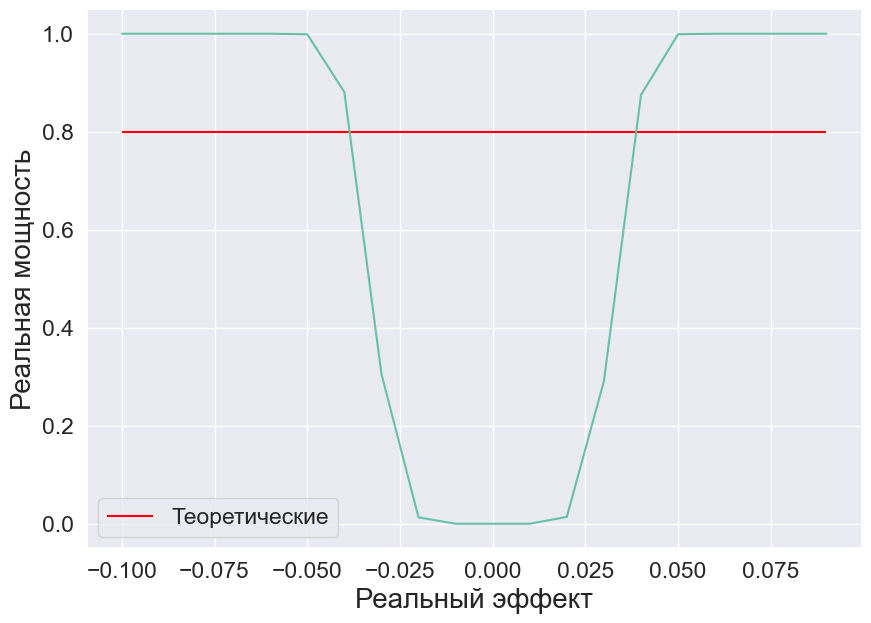

In [84]:
plt.figure(figsize=(10, 7))

# ваш код

plt.hlines(
    beta, real_effect_grid.min(), real_effect_grid.max(),
    color='red', label='Теоретические'
)

plt.plot(
    real_effect_grid, power
)

plt.xlabel('Реальный эффект', fontsize=20)
plt.ylabel('Реальная мощность', fontsize=20)

plt.legend()
plt.show()

**Вывод:** тест подтверждает, что заданный размер выборки позволяет детектировать эффект $mde=0.05$ с мощностью не меньшей $\beta=0.8$ 